# Logistische Regression

In diesem Notebook erstellen wir eine `Baseline` mit einer Logistischen Regression.
Wir verwenden dabei alle Features (Pixel-Farbkanal-Intensität) **ohne** Preprocessing (wie `Dimensions-Reduktion`).

In [12]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import pickle

import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import numpy as np

from mpl_toolkits.axes_grid1 import ImageGrid

In [13]:
def plot_confusion_matrix(y_true: any, y_pred: any):
    """
        Takes true and predicted labels (arrays) as input. Based on this, calculates and plots a confusion matrix.
    """
    labels = np.unique(y_true)
    fig = plt.figure(figsize=(len(labels), len(labels)))
    ConfusionMatrixDisplay(
      confusion_matrix=confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels, normalize='all'),
      display_labels=labels
    ).plot(ax=fig.gca(), cmap="BuPu", xticks_rotation='vertical', include_values=True)
    plt.show()

# Daten vorbereiten

In [14]:
# Daten laden und aufteilen in Features und Labels
with open('../data/train.pkl', 'rb') as f:
    data_train = pickle.load(f)
X_data = data_train["images"]
y_data = data_train["labels"]

In [15]:
# Daten aufteilen in Training Set (X_train, y_train) und Validation Set (X_val, y_val)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42)

# Logistische Regression

Training und Anwendung einer `Logistic Regression` auf allen Features.
Für die `Logistic Regression` müssen wir die dreidimensionalen Bilder (32, 32, 3) zu eindimensionalen Feature-Vektoren transformieren mittels `reshape(-1, 32 * 32 * 3)`.

In [16]:
%%time

lr = LogisticRegression()

lr.fit(X_train.reshape(-1, 32 * 32 * 3), y_train)

y_train_hat = lr.predict(X_train.reshape(-1, 32 * 32 * 3))
print("Train: ", accuracy_score(y_train_hat, y_train))

y_val_hat = lr.predict(X_val.reshape(-1, 32 * 32 * 3))
print("Val:   ", accuracy_score(y_val_hat, y_val))

/Users/beni/Documents/Kennwerte/IdeaProjects/cas_machine_learning_cifar10/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train:  0.4294133333333333
Val:    0.4044
CPU times: user 4min 31s, sys: 25.4 s, total: 4min 57s
Wall time: 48.8 s


Zufälliges Raten hätte eine erwartete Genauigkeit von rund 10%.
Unser erstes Modell hat eine Genauigkeit von 40% auf dem Validation Set und ist damit schon einmal deutlich besser als zufälliges Raten.

Wir erhalten eine `ConvergenceWarning`: `STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`.
Diese Warnung bedeutet, dass die Logistic Regression **noch nicht zum globalen Minimum konvergiert** ist.
Sprich, wir könnten die Logistic Regression weiter trainieren und sie wird sich auf dem `Trainings Set` noch verbessern.
Die Anzahl Trainingsschritte kann man über den Parameter `max_iter` einstellen.

## Konfusionsmatrix

Schauen wir aber zuerst die `Confusion Matrix` vom jetzigen Modell an, um festzustellen, wo wir Fehler machen.

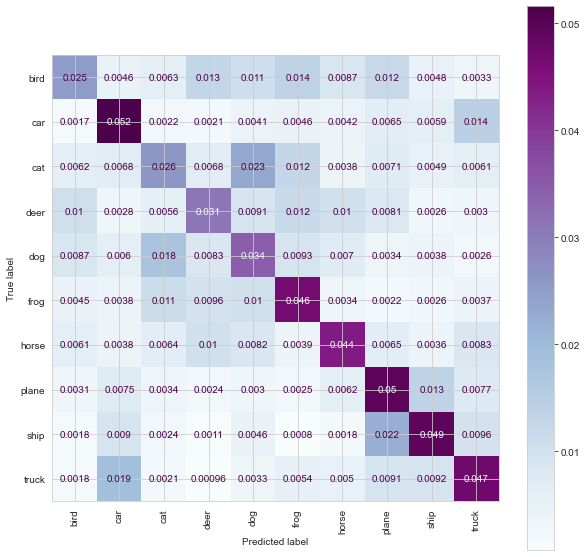

In [17]:
plot_confusion_matrix(y_true=y_val, y_pred=y_val_hat)

Grundsätzlich machen wir noch einige Fehler. Wir stellen fest, dass die Verteilung der Fehler aber intuitiv Sinn ergibt:

* `car` und `truck` werden öfters verwechselt.
* `dog` und `cat` werden öfters verwechselt.
* `ship` und `plane` werden öfters verwechselt. Wahrscheinlich liegt das auch daran, dass der Hintergrund bei beiden Bildern oft blau ist (Himmel oder Meer).

## Modellvorhersagen visualisieren

Wir visualisieren hier noch 100 Bilder aus dem `Validation Set` jeweils mit unserer **vorhergesagten Klasse**.

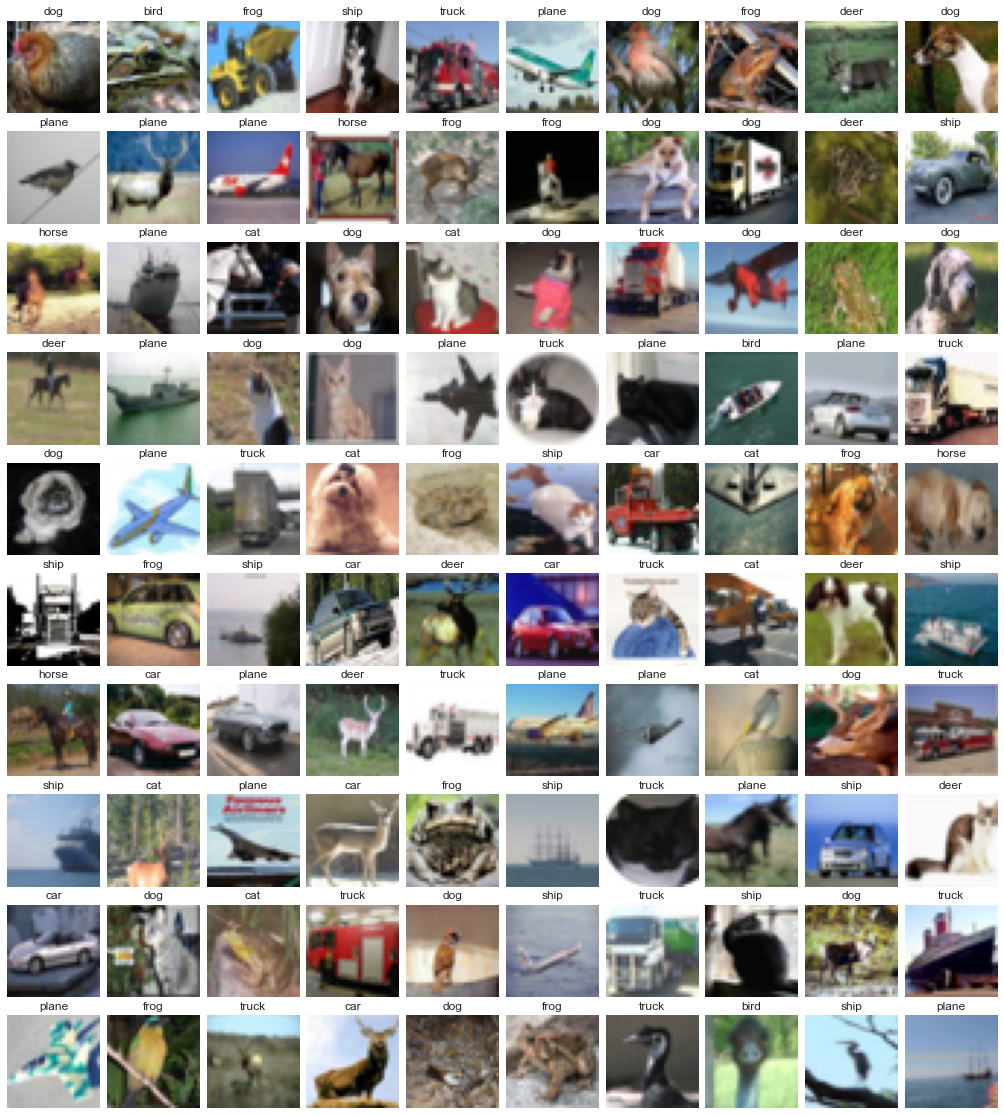

In [18]:
fig = plt.figure(figsize=(20., 20.))

grid = ImageGrid(fig, 111,
    nrows_ncols=(10, 10),
    axes_pad=(0.1, 0.25),
)

idx = np.arange(y_data.size)
np.random.shuffle(idx)

y_data_idx_pred = lr.predict(X_data[idx].reshape(-1, 32 * 32 * 3))

for ax, im, label in zip(grid, X_data[idx], y_data_idx_pred):
    ax.set_title(label)
    ax.axis('off')
    ax.imshow(im)

plt.show()

## Behandlung von `STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`

Schauen wir uns nun an, was passiert, wenn wir den Parameter `max_iter` erhöhen.
Im folgenden Code setzen wir die `max_iter=1000`:

In [19]:
%%time

lr_1k = LogisticRegression(max_iter=1000)
lr_1k.fit(X_train.reshape(-1, 32 * 32 * 3), y_train)

y_train_hat = lr_1k.predict(X_train.reshape(-1, 32 * 32 * 3))
print("Train: ", accuracy_score(y_train_hat, y_train))

y_val_hat = lr_1k.predict(X_val.reshape(-1, 32 * 32 * 3))
print("Val:   ", accuracy_score(y_val_hat, y_val))

/Users/beni/Documents/Kennwerte/IdeaProjects/cas_machine_learning_cifar10/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train:  0.4988533333333333
Val:    0.36928
CPU times: user 39min 55s, sys: 3min 29s, total: 43min 25s
Wall time: 8min 6s


Wir sehen, dass wir uns auf dem `Training Set` verbessern, aber anfangen uns auf dem `Validation Set` zu verschlechtern, ein Hinweis auf `Overfitting`.
Zudem ist das Modell immer noch nicht konvergiert, sprich wir müssten `max_iter` weiter erhöhen.

Da das Modell aber bereits anfängt zu `overfitten`, bringt es wenig einfach die `max_iter` noch weiter zu erhöhen. Zudem braucht das Modell bereits ziemlich lange für das Training. Bei "Nächste Schritte" beschreiben wir bessere Alternativen.

# Anwendung des Modells auf dem `Test Set`

Wenn wir mit der Leistung unseres Modells auf dem `Validation Set` zufrieden sind, können wir es auf das `Test Set` anwenden.

In [20]:
# Daten laden und aufteilen in Features und Labels
with open('../data/test.pkl', 'rb') as f:
    data_test = pickle.load(f)
X_test = data_test["images"]
y_test = data_test["labels"]

In [21]:
y_test_pred = lr.predict(X_test.reshape(-1, 32 * 32 * 3))

Evaluieren wir unsere test-set predictions

In [22]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.3988

## Nächste Schritte

Die Logistische Regression konvergiert nicht richtig, da wir **viele Datenpunkte (37500)** und **viele Features (3072)** haben.
Dafür haben wir im Theorie Teil die `Dimensions-Reduktion` mittels `PCA` (oder `NMF`) kennengelernt.
Mit `PCA` kann die Anzahl Features von 3072 beispielsweise auf 200 PC-Features reduziert werden.
Auf diesen 200 PC-Features können wir dann eine `Logistic Regression` oder auch eine `SVC` mit `rbf` Kernel trainieren, ohne dass wir in grosse Performanz-Probleme laufen.